# Communicate Data Findings (Dataset: Loan Data from prosper)

## by Ibn-Mohey

## Preliminary Wrangling

> This data set contains **113,937 loans** with **81 variables** on each loan, including loan **amount**, **borrower rate (or interest rate**), **current loan status**, borrower **income**, and many others
> (Last updated 03/11/2014)
# some suggested questions to answer
> What **factors** affect a loan’s **outcome status**?

> What affects the **borrower’s APR** or **interest rate**?


In [122]:
# import all packages and set plots to be embedded inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import os
path = r'E:\career\Dataa\udacity\Advanced Data Analysis Nanodegree Program\4. Data Visualization\08.Communicate Data Findings project\Data'
os.chdir(path)
%matplotlib inline
os.listdir()

['LoanData_cleaned.csv', 'loan_data_master.csv', 'prosperLoanData.csv']

In [123]:
#loading the data set 
df  = pd.read_csv('prosperLoanData.csv')

In [124]:
#size 
df.shape

(113937, 81)

i need to see all column [ref](https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf)
pd.set_option('display.max_columns', None)


In [125]:
pd.set_option('display.max_columns', None)

In [126]:
#quick view 
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [127]:
#more info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

for object columns i can explore using unique as i think it will be category /

In [128]:
#more objec details
df.select_dtypes(include ='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ListingKey               113937 non-null  object
 1   ListingCreationDate      113937 non-null  object
 2   CreditGrade              28953 non-null   object
 3   LoanStatus               113937 non-null  object
 4   ClosedDate               55089 non-null   object
 5   ProsperRating (Alpha)    84853 non-null   object
 6   BorrowerState            108422 non-null  object
 7   Occupation               110349 non-null  object
 8   EmploymentStatus         111682 non-null  object
 9   GroupKey                 13341 non-null   object
 10  DateCreditPulled         113937 non-null  object
 11  FirstRecordedCreditLine  113240 non-null  object
 12  IncomeRange              113937 non-null  object
 13  LoanKey                  113937 non-null  object
 14  LoanOriginationDate 

In [129]:
for col in df.select_dtypes(include ='object'):
    print(col ,'\n')
    print(df[col].unique(),'\n')

ListingKey 

['1021339766868145413AB3B' '10273602499503308B223C1'
 '0EE9337825851032864889A' ... 'E6E13596170052029692BB1'
 'E6EB3531504622671970D9E' 'E6ED3600409833199F711B7'] 

ListingCreationDate 

['2007-08-26 19:09:29.263000000' '2014-02-27 08:28:07.900000000'
 '2007-01-05 15:00:47.090000000' ... '2013-12-13 05:49:12.703000000'
 '2011-11-14 13:18:26.597000000' '2014-01-15 09:27:37.657000000'] 

CreditGrade 

['C' nan 'HR' 'AA' 'D' 'B' 'E' 'A' 'NC'] 

LoanStatus 

['Completed' 'Current' 'Past Due (1-15 days)' 'Defaulted' 'Chargedoff'
 'Past Due (16-30 days)' 'Cancelled' 'Past Due (61-90 days)'
 'Past Due (31-60 days)' 'Past Due (91-120 days)' 'FinalPaymentInProgress'
 'Past Due (>120 days)'] 

ClosedDate 

['2009-08-14 00:00:00' nan '2009-12-17 00:00:00' ... '2006-10-25 00:00:00'
 '2005-12-08 00:00:00' '2005-11-25 00:00:00'] 

ProsperRating (Alpha) 

[nan 'A' 'D' 'B' 'E' 'C' 'AA' 'HR'] 

BorrowerState 

['CO' 'GA' 'MN' 'NM' 'KS' 'CA' 'IL' 'MD' nan 'AL' 'AZ' 'VA' 'FL' 'PA' 'OR'
 'MI

LoanKey 

['E33A3400205839220442E84' '9E3B37071505919926B1D82'
 '6954337960046817851BCB2' ... 'DD1A370200396006300ACA0'
 '589536350469116027ED11B' '00AF3704550953269A64E40'] 

LoanOriginationDate 

['2007-09-12 00:00:00' '2014-03-03 00:00:00' '2007-01-17 00:00:00' ...
 '2009-07-23 00:00:00' '2008-10-17 00:00:00' '2005-11-15 00:00:00'] 

LoanOriginationQuarter 

['Q3 2007' 'Q1 2014' 'Q1 2007' 'Q4 2012' 'Q3 2013' 'Q4 2013' 'Q2 2013'
 'Q2 2012' 'Q4 2007' 'Q3 2006' 'Q1 2013' 'Q2 2010' 'Q1 2012' 'Q3 2012'
 'Q4 2010' 'Q4 2011' 'Q3 2008' 'Q2 2007' 'Q4 2006' 'Q2 2011' 'Q1 2011'
 'Q1 2008' 'Q3 2009' 'Q3 2011' 'Q2 2008' 'Q1 2010' 'Q4 2009' 'Q2 2006'
 'Q3 2010' 'Q1 2006' 'Q4 2008' 'Q4 2005' 'Q2 2009'] 

MemberKey 

['1F3E3376408759268057EDA' '1D13370546739025387B2F4'
 '5F7033715035555618FA612' ... '2EC435768441332602FDC15'
 '0FE0370029359765342FDB5' 'CE1E3704648000761C9F724'] 



In [130]:
for col in df.select_dtypes(include ='object'):
    print(col)

ListingKey
ListingCreationDate
CreditGrade
LoanStatus
ClosedDate
ProsperRating (Alpha)
BorrowerState
Occupation
EmploymentStatus
GroupKey
DateCreditPulled
FirstRecordedCreditLine
IncomeRange
LoanKey
LoanOriginationDate
LoanOriginationQuarter
MemberKey


from the big fat print above i can see, that it's hard to be adata scientes with no good understanding of things and, that will give my enough challenge to complete and 

|    	| column                  	| what to do       	| why and more                  	|
|----	|-------------------------	|------------------	|-------------------------------	|
| 1  	| ListingKey              	|  leave it for now	| is just the PK                	|
| 2  	| ListingCreationDate     	|  must            	|  should be data   formated    	|
| 3  	| CreditGrade             	| leave it for now 	| i cant find out what is that  	|
| 4  	| LoanStatus              	|  must            	|                               	|
| 5  	| ClosedDate              	|  might           	| should be data formated       	|
| 6  	| ProsperRating (Alpha)   	|  MIGHT           	|  THRER IS NUMERICAL ONE   TOO 	|
| 7  	| BorrowerState           	|  might           	|                               	|
| 8  	| Occupation              	|  MUST            	|                               	|
| 9  	| EmploymentStatus        	|  MUST            	|                               	|
| 10 	| GroupKey                	| drop             	| MIGHT BE FK FOR another table 	|
| 11 	| DateCreditPulled        	|  might           	| should be data formated       	|
| 12 	| FirstRecordedCreditLine 	|  might           	| should be data formated       	|
| 13 	| IncomeRange             	|  must            	|                               	|
| 14 	| LoanKey                 	| drop             	| MIGHT BE FK FOR another table 	|
| 15 	| LoanOriginationDate     	| must             	| should be data formated       	|
| 16 	| LoanOriginationQuarter  	|  might           	|                               	|
| 17 	| MemberKey               	| drop             	| MIGHT BE FK FOR another table 	|

sorry i am a bit of nerd
[table](https://www.tablesgenerator.com/markdown_tables#)

In [131]:
#more float64 Deatils df.reindex(sorted(df.columns), axis=1)
#source https://stackoverflow.com/questions/11067027/re-ordering-columns-in-pandas-dataframe-based-on-column-name
df.select_dtypes(include ='float64').reindex(sorted(df.columns), axis=1).describe()

,AmountDelinquent,AvailableBankcardCredit,BankcardUtilization,BorrowerAPR,BorrowerRate,BorrowerState,ClosedDate,CreditGrade,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,CurrentDelinquencies,CurrentlyInGroup,DateCreditPulled,DebtToIncomeRatio,DelinquenciesLast7Years,EmploymentStatus,EmploymentStatusDuration,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,FirstRecordedCreditLine,GroupKey,IncomeRange,IncomeVerifiable,InquiriesLast6Months,InvestmentFromFriendsAmount,InvestmentFromFriendsCount,Investors,IsBorrowerHomeowner,LP_CollectionFees,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_GrossPrincipalLoss,LP_InterestandFees,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,LP_ServiceFees,LenderYield,ListingCategory (numeric),ListingCreationDate,ListingKey,ListingNumber,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanKey,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,LoanStatus,MemberKey,MonthlyLoanPayment,Occupation,OnTimeProsperPayments,OpenCreditLines,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,PercentFunded,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ProsperRating (Alpha),ProsperRating (numeric),ProsperScore,PublicRecordsLast10Years,PublicRecordsLast12Months,Recommendations,RevolvingCreditBalance,ScorexChangeAtTimeOfListing,StatedMonthlyIncome,Term,TotalCreditLinespast7years,TotalInquiries,TotalProsperLoans,TotalProsperPaymentsBilled,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months
count,106315.000000,106393.000000,106333.000000,113912.000000,113937.000000,0.0,0.0,0.0,113346.000000,113346.000000,106333.000000,113240.000000,0.0,0.0,105383.000000,112947.000000,0.0,106312.000000,84853.000000,84853.000000,84853.000000,0.0,0.0,0.0,0.0,113240.000000,113937.000000,0.0,0.0,0.0,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,0.0,0.0,0.0,0.0,0.0,16952.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113937.000000,0.0,22085.000000,106333.000000,0.0,113937.000000,113937.000000,22085.000000,22085.000000,22085.000000,22085.000000,0.0,84853.000000,84853.000000,113240.000000,106333.000000,0.0,1.063330e+05,18928.000000,1.139370e+05,0.0,113240.000000,112778.000000,22085.000000,22085.000000,106393.000000,106393.000000,106393.000000
mean,984.507059,11210.225447,0.561309,0.218828,0.192764,NaN,NaN,NaN,685.567731,704.567731,10.317192,0.592052,NaN,NaN,0.275947,4.154984,NaN,96.071582,0.168661,0.080306,0.096068,NaN,NaN,NaN,NaN,1.435085,16.550751,NaN,NaN,NaN,-14.242698,4183.079489,3105.536588,700.446342,1077.542901,681.420499,25.142686,-54.725641,0.182701,NaN,NaN,NaN,NaN,NaN,16.268464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,272.475783,NaN,22.271949,9.260164,NaN,398.292161,0.998584,0.613629,0.048540,8472.311961,2930.313906,NaN,4.072243,5.950067,0.312646,0.015094,NaN,1.759871e+04,-3.223214,5.608026e+03,NaN,26.754539,5.584405,1.421100,22.934345,23.230034,0.885897,0.802327
std,7158.270157,19818.361309,0.317918,0.080364,0.074818,NaN,NaN,NaN,66.458275,66.458275,5.457866,1.978707,NaN,NaN,0.551759,10.160216,NaN,94.480605,0.068467,0.046764,0.030403,NaN,NaN,NaN,NaN,2.437507,294.545422,NaN,NaN,NaN,109.232758,4790.907234,4069.527670,2388.513831,1183.414168,2357.167068,275.657937,60.675425,0.074516,NaN,NaN,NaN,NaN,NaN,9.005898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.697812,NaN,18.830425,5.022644,NaN,447.159711,0.017919,2.446827,0.556285,7395.507650,3806.635075,NaN,1.673227,2.376501,0.727868,0.154092,NaN,3.293640e+04,50.063567,7.478497e+03,NaN,13.637871,6.429946,0.764042,19.249584,11.871311,0.148179,1.097637
min,0.000000,0.000000,0.000000,0.006530,0.000000,NaN,NaN,NaN,0.000000,19.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000,-0.182700,0.004900,-0.182700,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,-9274.750000,-2.349900,0.000000,-94.200000,-2.349900,-954.550000,0.000000,-664.870000,-0.010000,NaN,Na

In [132]:
pd.options.display.max_rows = 999
print(
    df.select_dtypes(include ='float64').reindex(sorted(df.columns), axis=1).std()
)
pd.options.display.max_rows = 15

AmountDelinquent                        7158.270157
AvailableBankcardCredit                19818.361309
BankcardUtilization                        0.317918
BorrowerAPR                                0.080364
BorrowerRate                               0.074818
BorrowerState                                   NaN
ClosedDate                                      NaN
CreditGrade                                     NaN
CreditScoreRangeLower                     66.458275
CreditScoreRangeUpper                     66.458275
CurrentCreditLines                         5.457866
CurrentDelinquencies                       1.978707
CurrentlyInGroup                                NaN
DateCreditPulled                                NaN
DebtToIncomeRatio                          0.551759
DelinquenciesLast7Years                   10.160216
EmploymentStatus                                NaN
EmploymentStatusDuration                  94.480605
EstimatedEffectiveYield                    0.068467
EstimatedLos

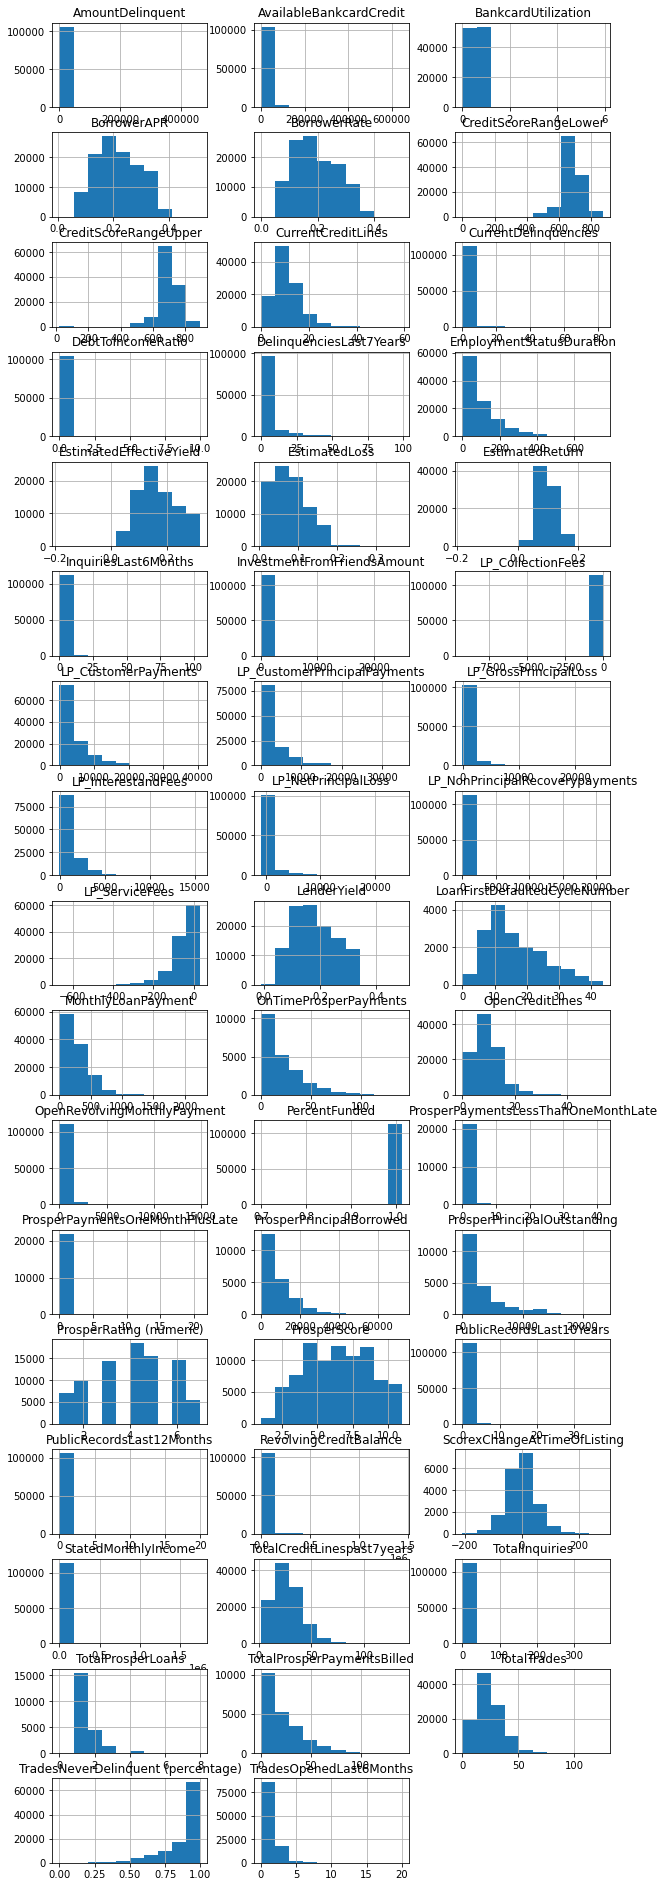

In [133]:
df.select_dtypes(include ='float64').hist(figsize = [10,50] , layout = [25,3] , xlabelsize = 10);

i know i went nuts here but i wanted to see how the data distriputed 

by the way i cant add megein to all of that to see the font and the typing good can u help ?


and how we can see that there is some un usfull data deu to it's poor distribution 
i will look at the STD also and then look at there nunique it might be not float after all 

|    	| column name                         	| STD         	| what to do          	|
|----	|-------------------------------------	|-------------	|---------------------	|
| 1  	| AmountDelinquent                    	| 7158.270157 	| see nunique         	|
| 2  	| AvailableBankcardCredit             	| 19818.36131 	| see nunique         	|
| 3  	| BankcardUtilization                 	| 0.317918    	| see nunique         	|
| 4  	| BorrowerAPR                         	| 0.080364    	| normally distriuted 	|
| 5  	| BorrowerRate                        	| 0.074818    	| normally distriuted 	|
| 6  	| BorrowerState                       	| NaN         	| missing data        	|
| 7  	| ClosedDate                          	| NaN         	| missing data        	|
| 8  	| CreditGrade                         	| NaN         	| missing data        	|
| 9  	| CreditScoreRangeLower               	| 66.458275   	| left skwed          	|
| 10 	| CreditScoreRangeUpper               	| 66.458275   	| left skwed          	|
| 11 	| CurrentCreditLines                  	| 5.457866    	| right skwed         	|
| 12 	| CurrentDelinquencies                	| 1.978707    	| see nunique         	|
| 13 	| CurrentlyInGroup                    	| NaN         	| missing data        	|
| 14 	| DateCreditPulled                    	| NaN         	| missing data        	|
| 15 	| DebtToIncomeRatio                   	| 0.551759    	| see nunique         	|
| 16 	| DelinquenciesLast7Years             	| 10.160216   	| right skwed         	|
| 17 	| EmploymentStatus                    	| NaN         	| missing data        	|
| 18 	| EmploymentStatusDuration            	| 94.480605   	| right skwed         	|
| 19 	| EstimatedEffectiveYield             	| 0.068467    	| normally distriuted 	|
| 20 	| EstimatedLoss                       	| 0.046764    	| right skwed         	|
| 21 	| EstimatedReturn                     	| 0.030403    	| undistripuuted      	|
| 22 	| FirstRecordedCreditLine             	| NaN         	| missing data        	|
| 23 	| GroupKey                            	| NaN         	| missing data        	|
| 24 	| IncomeRange                         	| NaN         	| missing data        	|
| 25 	| IncomeVerifiable                    	| NaN         	| missing data        	|
| 26 	| InquiriesLast6Months                	| 2.437507    	| see nunique         	|
| 27 	| InvestmentFromFriendsAmount         	| 294.545422  	| see nunique         	|
| 28 	| InvestmentFromFriendsCount          	| NaN         	| missing data        	|
| 29 	| Investors                           	| NaN         	| missing data        	|
| 30 	| IsBorrowerHomeowner                 	| NaN         	| missing data        	|
| 31 	| LP_CollectionFees                   	| 109.232758  	| see nunique         	|
| 32 	| LP_CustomerPayments                 	| 4790.907234 	| see nunique         	|
| 33 	| LP_CustomerPrincipalPayments        	| 4069.52767  	| see nunique         	|
| 34 	| LP_GrossPrincipalLoss               	| 2388.513831 	| see nunique         	|
| 35 	| LP_InterestandFees                  	| 1183.414168 	| see nunique         	|
| 36 	| LP_NetPrincipalLoss                 	| 2357.167068 	| see nunique         	|
| 37 	| LP_NonPrincipalRecoverypayments     	| 275.657937  	| see nunique         	|
| 38 	| LP_ServiceFees                      	| 60.675425   	| left skwed          	|
| 39 	| LenderYield                         	| 0.074516    	| right skwed         	|
| 40 	| ListingCategory                     	| NaN         	| missing data        	|
| 41 	| ListingCreationDate                 	| NaN         	| missing data        	|
| 42 	| ListingKey                          	| NaN         	| missing data        	|
| 43 	| ListingNumber                       	| NaN         	| missing data        	|
| 44 	| LoanCurrentDaysDelinquent           	| NaN         	| missing data        	|
| 45 	| LoanFirstDefaultedCycleNumber       	| 9.005898    	| normally distriuted 	|
| 46 	| LoanKey                             	| NaN         	| missing data        	|
| 47 	| LoanMonthsSinceOrigination          	| NaN         	| missing data        	|
| 48 	| LoanNumber                          	| NaN         	| missing data        	|
| 49 	| LoanOriginalAmount                  	| NaN         	| missing data        	|
| 50 	| LoanOriginationDate                 	| NaN         	| missing data        	|
| 51 	| LoanOriginationQuarter              	| NaN         	| missing data        	|
| 52 	| LoanStatus                          	| NaN         	| missing data        	|
| 53 	| MemberKey                           	| NaN         	| missing data        	|
| 54 	| MonthlyLoanPayment                  	| 192.697812  	| see nunique         	|
| 55 	| Occupation                          	| NaN         	| missing data        	|
| 56 	| OnTimeProsperPayments               	| 18.830425   	| right skwed         	|
| 57 	| OpenCreditLines                     	| 5.022644    	| right skwed         	|
| 58 	| OpenRevolvingAccounts               	| NaN         	| missing data        	|
| 59 	| OpenRevolvingMonthlyPayment         	| 447.159711  	| see nunique         	|
| 60 	| PercentFunded                       	| 0.017919    	| see nunique         	|
| 61 	| ProsperPaymentsLessThanOneMonthLate 	| 2.446827    	| see nunique         	|
| 62 	| ProsperPaymentsOneMonthPlusLate     	| 0.556285    	| see nunique         	|
| 63 	| ProsperPrincipalBorrowed            	| 7395.50765  	| left skwed          	|
| 64 	| ProsperPrincipalOutstanding         	| 3806.635075 	| left skwed          	|
| 65 	| ProsperRating                       	| NaN         	| missing data        	|
| 66 	| ProsperRating                       	| 1.673227    	| normally distriuted 	|
| 67 	| ProsperScore                        	| 2.376501    	| right skwed         	|
| 68 	| PublicRecordsLast10Years            	| 0.727868    	| see nunique         	|
| 69 	| PublicRecordsLast12Months           	| 0.154092    	| see nunique         	|
| 70 	| Recommendations                     	| NaN         	| missing data        	|
| 71 	| RevolvingCreditBalance              	| 32936.40179 	| see nunique         	|
| 72 	| ScorexChangeAtTimeOfListing         	| 50.063567   	| normally distriuted 	|
| 73 	| StatedMonthlyIncome                 	| 7478.497275 	| see nunique         	|
| 74 	| Term                                	| NaN         	| missing data        	|
| 75 	| TotalCreditLinespast7years          	| 13.637871   	| see nunique         	|
| 76 	| TotalInquiries                      	| 6.429946    	| right skwed         	|
| 77 	| TotalProsperLoans                   	| 0.764042    	| see nunique         	|
| 78 	| TotalProsperPaymentsBilled          	| 19.249584   	| right skwed         	|
| 79 	| TotalTrades                         	| 11.871311   	| right skwed         	|
| 80 	| TradesNeverDelinquent               	| 0.148179    	| (percentage)        	|
| 81 	| TradesOpenedLast6Months             	| 1.097637    	| right skwed         	|


i will look at visulziaton later on now for the nuniqe value that are floats


In [134]:
float_to_check = df[['AmountDelinquent',
'AvailableBankcardCredit',
'BankcardUtilization',
'CurrentDelinquencies',
'DebtToIncomeRatio',
'InquiriesLast6Months',
'InvestmentFromFriendsAmount',
'LP_CollectionFees',
'LP_CustomerPayments',
'LP_CustomerPrincipalPayments',
'LP_GrossPrincipalLoss',
'LP_InterestandFees',
'LP_NetPrincipalLoss',
'LP_NonPrincipalRecoverypayments',
'MonthlyLoanPayment',
'OpenRevolvingMonthlyPayment',
'PercentFunded',
'ProsperPaymentsLessThanOneMonthLate',
'ProsperPaymentsOneMonthPlusLate',
'PublicRecordsLast10Years',
'PublicRecordsLast12Months',
'RevolvingCreditBalance',
'StatedMonthlyIncome',
'TotalCreditLinespast7years',
'TotalProsperLoans',
]]
for col in float_to_check:
    print(col ,'\n')
    print(df[col].unique(),'\n')

AmountDelinquent 

[  472.     0.    nan ... 15899. 20235.  5062.] 

AvailableBankcardCredit 

[ 1500. 10266.    nan ... 50669. 24505. 34415.] 

BankcardUtilization 

[0.   0.21  nan 0.04 0.81 0.39 0.72 0.13 0.11 0.51 0.32 0.7  0.43 0.97
 1.   0.54 0.6  0.95 0.08 0.4  0.84 0.17 0.07 0.3  0.09 0.31 0.34 0.8
 0.01 0.91 0.58 0.55 0.93 0.1  0.46 0.69 0.74 0.63 0.68 0.36 0.37 0.61
 0.87 0.45 0.57 0.59 0.41 0.89 0.19 0.94 0.9  0.79 0.76 0.86 0.53 0.48
 0.73 0.05 0.98 0.99 0.29 0.92 0.03 0.22 0.56 0.64 0.83 0.96 0.35 0.5
 0.14 1.31 0.33 0.27 0.24 0.44 0.62 0.82 0.12 0.71 0.52 0.42 0.16 0.88
 0.23 0.25 0.06 0.75 0.65 1.04 0.78 0.77 0.47 0.49 0.85 0.66 0.38 1.01
 0.15 0.26 0.67 1.03 0.28 1.1  1.34 1.09 0.02 1.2  0.2  1.02 0.18 1.05
 1.12 1.3  1.35 1.13 1.08 1.07 1.14 1.16 1.06 1.15 1.59 1.21 1.19 1.22
 4.73 1.18 1.23 1.25 1.54 1.17 1.26 1.61 1.81 1.11 1.32 1.75 1.24 1.76
 1.65 1.51 1.57 1.62 1.27 1.5  5.95 1.38 1.29 1.36 1.86 1.28 1.47 1.43
 1.4  1.44 1.8  2.66 2.36 1.78 1.37 1.63 1.46 1.79 1.9

looking at this data from the last line was hard 
explain it will be harder 
but i got some views of it 

In [135]:
#more int64 Deatils
df.select_dtypes(include ='int64').reindex(sorted(df.columns), axis=1).describe()

,AmountDelinquent,AvailableBankcardCredit,BankcardUtilization,BorrowerAPR,BorrowerRate,BorrowerState,ClosedDate,CreditGrade,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,CurrentDelinquencies,CurrentlyInGroup,DateCreditPulled,DebtToIncomeRatio,DelinquenciesLast7Years,EmploymentStatus,EmploymentStatusDuration,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,FirstRecordedCreditLine,GroupKey,IncomeRange,IncomeVerifiable,InquiriesLast6Months,InvestmentFromFriendsAmount,InvestmentFromFriendsCount,Investors,IsBorrowerHomeowner,LP_CollectionFees,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_GrossPrincipalLoss,LP_InterestandFees,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,LP_ServiceFees,LenderYield,ListingCategory (numeric),ListingCreationDate,ListingKey,ListingNumber,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanKey,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,LoanStatus,MemberKey,MonthlyLoanPayment,Occupation,OnTimeProsperPayments,OpenCreditLines,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,PercentFunded,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ProsperRating (Alpha),ProsperRating (numeric),ProsperScore,PublicRecordsLast10Years,PublicRecordsLast12Months,Recommendations,RevolvingCreditBalance,ScorexChangeAtTimeOfListing,StatedMonthlyIncome,Term,TotalCreditLinespast7years,TotalInquiries,TotalProsperLoans,TotalProsperPaymentsBilled,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113937.000000,113937.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113937.000000,0.0,0.0,1.139370e+05,113937.000000,0.0,0.0,113937.000000,113937.000000,113937.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113937.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113937.000000,0.0,0.0,0.0,113937.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023460,80.475228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.774209,NaN,NaN,6.278857e+05,152.816539,NaN,NaN,31.896882,69444.474271,8337.01385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.96979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048027,NaN,NaN,NaN,40.830248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.232412,103.239020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.996797,NaN,NaN,3.280762e+05,466.320254,NaN,NaN,29.974184,38930.479610,6245.80058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.63097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.332353,NaN,NaN,NaN,10.436212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,4.000000e+00,0.000000,NaN,NaN,0.000000,1.000000,1000.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,4.009190e+05,0.000000,NaN,NaN,6.000000,37332.000000,4000.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,44.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,6.005540e+05,0.000000,NaN,NaN,21.000000,68599.000000,6500.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,36.000000,NaN,NaN,NaN,Na

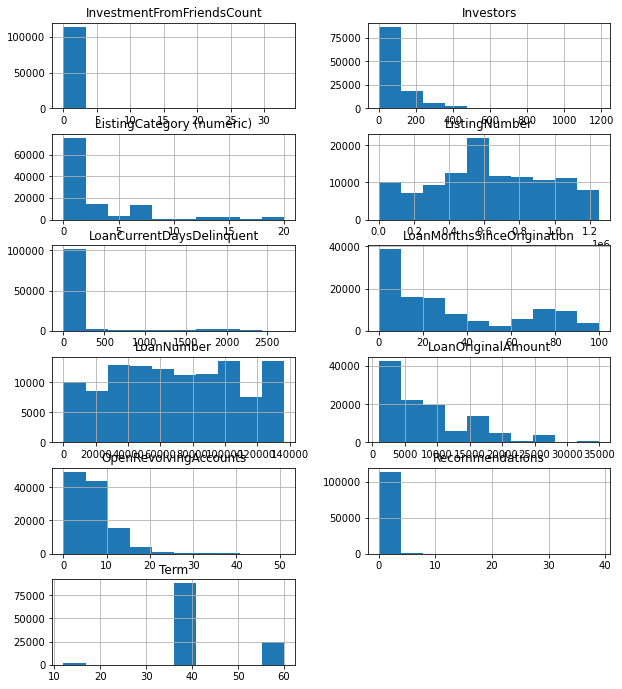

In [136]:
df.select_dtypes(include ='int64').hist(figsize = [10,20] , layout = [10,2] , xlabelsize = 10);

In [137]:
#i must clean the data if i need to get any thing here there is alot of missing data 

In [138]:
#final look at bool
#see what is bool 
df.select_dtypes(include ='bool').info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   IsBorrowerHomeowner  113937 non-null  bool 
 1   CurrentlyInGroup     113937 non-null  bool 
 2   IncomeVerifiable     113937 non-null  bool 
dtypes: bool(3)
memory usage: 333.9 KB


# clean the data

In [139]:
#dropfrit unneeded from object
df.drop(columns = ['MemberKey','LoanKey','GroupKey'],inplace = True)

In [140]:
#duplicates 
df = df.drop_duplicates()

In [141]:
#to date

#creat list
to_date = [
'LoanOriginationDate',
'FirstRecordedCreditLine',
'DateCreditPulled',
'ClosedDate',
    'ListingCreationDate'
     ]

#object to date

for i in to_date:
    df[i] = pd.to_datetime(df[i])

    
#date to month and year 

for i in to_date:
    df[i+"_year"] = df[i].dt.year
    df[i+"_month"] = df[i].dt.month

In [142]:
#link https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset/51071037
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [143]:
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
pd.options.display.max_rows = 999
missing_value_df[missing_value_df['percent_missing'] > 0]

,column_name,percent_missing
LoanFirstDefaultedCycleNumber,LoanFirstDefaultedCycleNumber,85.121602
ScorexChangeAtTimeOfListing,ScorexChangeAtTimeOfListing,83.387311
ProsperPaymentsOneMonthPlusLate,ProsperPaymentsOneMonthPlusLate,80.616481
ProsperPrincipalOutstanding,ProsperPrincipalOutstanding,80.616481
OnTimeProsperPayments,OnTimeProsperPayments,80.616481
ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsLessThanOneMonthLate,80.616481
TotalProsperLoans,TotalProsperLoans,80.616481
ProsperPrincipalBorrowed,ProsperPrincipalBorrowed,80.616481
TotalProsperPaymentsBilled,TotalProsperPaymentsBilled,80.616481
CreditGrade,CreditGrade,74.588588


the missing data in the col are alot i feel safe to drop a lot of these colums as i dont think i can use them like that 

In [144]:
missing_column = []
for i in missing_value_df[missing_value_df['percent_missing'] > 70].iterrows():
    missing_column.append(i[0])
df.drop(columns = missing_column,inplace = True)

In [145]:
#the rest columns are 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 0 to 113936
Data columns (total 78 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   ListingKey                          113937 non-null  object        
 1   ListingNumber                       113937 non-null  int64         
 2   ListingCreationDate                 113937 non-null  datetime64[ns]
 3   Term                                113937 non-null  int64         
 4   LoanStatus                          113937 non-null  object        
 5   ClosedDate                          55089 non-null   datetime64[ns]
 6   BorrowerAPR                         113912 non-null  float64       
 7   BorrowerRate                        113937 non-null  float64       
 8   LenderYield                         113937 non-null  float64       
 9   EstimatedEffectiveYield             84853 non-null   float64       
 10  Estimate

from these columns i might use 
1. BorrowerAPR
2. BorrowerRate
3. BorrowerState
4. CurrentCreditLines
5. DateCreditPulled_year
6. DateCreditPulled_month
7. DateCreditPulled
8. DebtToIncomeRatio
9. EmploymentStatus
10. EmploymentStatusDuration
11. EstimatedEffectiveYield
12. EstimatedLoss
13. EstimatedReturn
14. IncomeRange
15. IncomeRange
16. IncomeVerifiable
17. Investors
18. IsBorrowerHomeowner
19. ListingCategory  (numeric)
20. ListingKey
24. ListingNumber
25. LoanOriginalAmount
26. LoanOriginationDate
27. LoanOriginationDate_year
28. LoanOriginationDate_month
29. LoanStatus
30. LP_CollectionFees
31. LP_CustomerPayments
32. LP_CustomerPrincipalPayments
33. LP_GrossPrincipalLoss
34. LP_InterestandFees
35. LP_NetPrincipalLoss
36. LP_NonPrincipalRecoverypayments
37. LP_ServiceFees
38. MonthlyLoanPayment
39. Occupation
40. OpenCreditLines
41. OpenRevolvingAccounts
42. ProsperRating (Alpha)
43. ProsperScore
44. Recommendations
45. StatedMonthlyIncome
46. Term
47. TotalInquiries
48. TotalTrades





In [146]:
features = ['BorrowerAPR',
'BorrowerRate',
'BorrowerState',
'CurrentCreditLines',
'DateCreditPulled_year',
'DateCreditPulled_month',
'DateCreditPulled',
'DebtToIncomeRatio',
'EmploymentStatus',
'EmploymentStatusDuration',
'EstimatedEffectiveYield',
'EstimatedLoss',
'EstimatedReturn',
'IncomeRange',
'IncomeVerifiable',
'Investors',
'IsBorrowerHomeowner',
'ListingCategory (numeric)',
'ListingKey',
'ListingNumber',
'ListingCreationDate',           
'ListingCreationDate_year' ,      
'ListingCreationDate_month',       
'LoanOriginalAmount',
'LoanOriginationDate',
'LoanOriginationDate_year',
'LoanOriginationDate_month',
'LoanStatus',
'LP_CollectionFees',
'LP_CustomerPayments',
'LP_CustomerPrincipalPayments',
'LP_GrossPrincipalLoss',
'LP_InterestandFees',
'LP_NetPrincipalLoss',
'LP_NonPrincipalRecoverypayments',
'LP_ServiceFees',
'MonthlyLoanPayment',
'Occupation',
'OpenCreditLines',
'OpenRevolvingAccounts',
'ProsperRating (Alpha)',
'ProsperScore',
'Recommendations',
'StatedMonthlyIncome',
'Term',
'TotalInquiries',
'TotalTrades',
]
features_df = df[features]
features_df

,BorrowerAPR,BorrowerRate,BorrowerState,CurrentCreditLines,DateCreditPulled_year,DateCreditPulled_month,DateCreditPulled,DebtToIncomeRatio,EmploymentStatus,EmploymentStatusDuration,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,IncomeRange,IncomeVerifiable,Investors,IsBorrowerHomeowner,ListingCategory (numeric),ListingKey,ListingNumber,ListingCreationDate,ListingCreationDate_year,ListingCreationDate_month,LoanOriginalAmount,LoanOriginationDate,LoanOriginationDate_year,LoanOriginationDate_month,LoanStatus,LP_CollectionFees,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_GrossPrincipalLoss,LP_InterestandFees,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,LP_ServiceFees,MonthlyLoanPayment,Occupation,OpenCreditLines,OpenRevolvingAccounts,ProsperRating (Alpha),ProsperScore,Recommendations,StatedMonthlyIncome,Term,TotalInquiries,TotalTrades
0,0.16516,0.1580,CO,5.0,2007,8,2007-08-26 18:41:46.780,0.17,Self-employed,2.0,NaN,NaN,NaN,"$25,000-49,999",True,258,True,0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,2007,8,9425,2007-09-12,2007,9,Completed,0.0,11396.1400,9425.00,0.0,1971.1400,0.0,0.0,-133.18,330.43,Other,4.0,1,NaN,NaN,0,3083.333333,36,3.0,11.0
1,0.12016,0.0920,CO,14.0,2014,2,2014-02-27 08:28:14.000,0.18,Employed,44.0,0.07960,0.0249,0.05470,"$50,000-74,999",True,1,False,2,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,2014,2,10000,2014-03-03,2014,3,Current,0.0,0.0000,0.00,0.0,0.0000,0.0,0.0,0.00,318.93,Professional,14.0,13,A,7.0,0,6125.000000,36,5.0,29.0
2,0.28269,0.2750,GA,NaN,2007,1,2007-01-02 14:09:10.060,0.06,Not available,NaN,NaN,NaN,NaN,Not displayed,True,41,False,0,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,2007,1,3001,2007-01-17,2007,1,Completed,0.0,4186.6300,3001.00,0.0,1185.6300,0.0,0.0,-24.20,123.32,Other,NaN,0,NaN,NaN,0,2083.333333,36,1.0,NaN
3,0.12528,0.0974,GA,5.0,2012,10,2012-10-22 11:02:32.000,0.15,Employed,113.0,0.08490,0.0249,0.06000,"$25,000-49,999",True,158,True,16,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,2012,10,10000,2012-11-01,2012,11,Current,0.0,5143.2000,4091.09,0.0,1052.1100,0.0,0.0,-108.01,321.45,Skilled Labor,5.0,7,A,9.0,0,2875.000000,36,1.0,26.0
4,0.24614,0.2085,MN,19.0,2013,9,2013-09-14 18:38:44.000,0.26,Employed,44.0,0.18316,0.0925,0.09066,"$100,000+",True,20,True,2,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,2013,9,15000,2013-09-20,2013,9,Current,0.0,2819.8500,1563.22,0.0,1256.6300,0.0,0.0,-60.27,563.97,Executive,19.0,6,D,4.0,0,9583.333333,36,9.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,0.22354,0.1864,IL,9.0,2013,4,2013-04-14 05:54:58.000,0.13,Employed,246.0,0.16490,0.0699,0.09500,"$50,000-74,999",True,1,True,1,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663,2013,4,10000,2013-04-22,2013,4,Current,0.0,3647.4000,2238.38,0.0,1409.0200,0.0,0.0,-75.58,364.74,Food Service Management,9.0,9,C,5.0,0,4333.333333,36,0.0,37.0
113933,0.13220,0.1110,PA,14.0,2011,11,2011-11-03 20:42:53.000,0.11,Employed,21.0,0.10070,0.0200,0.08070,"$75,000-99,999",True,22,True,7,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333,2011,11,2000,2011-11-07,2011,11,FinalPaymentInProgress,0.0,2330.5500,1997.16,0.0,333.3900,0.0,0.0,-30.05,65.57,Professional,13.0,9,A,8.0,0,8041.666667,36,4.0,39.0
113934,0.23984,0.2150,TX,12.0,2013,12,2013-12-13 05:49:15.000,0.51,Employed,84.0,0.18828,0.1025,0.08578,"$25,000-49,999",True,119,True,1,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703,2013,12,10000,2013-12-23,2013,12,Current,0.0,546.7000,183.15,0.0,363.5500,0.0,0.0,-16.91,273.35,Other,12.0,9,D,3.0,0,2875.000000,60,2.0,25.0
113935,0.28408,0.2605,GA,11.0,2011,11,2011-11-14 13:18:24.000,0.48,Full-time,94.0,0.24450,0.0850,0.15950,"$25,000-49,999",True,274,True,2,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597,2011,11,15000,2011-11-21,2011,11,Completed,0.0,21122.5600,15000.00,0.0,6122.5600,0.0

### What is the structure of your dataset?

bool(3), , , object
> The Data set contains **113,937 loans (rows)** with **81 variables (columns)** on each loan. 
Most variables are (numeric) float64(50) int64(11)

> strings (objects) (17).

> 3 bool val 
1.     IsBorrowerHomeowner                  113937 non-null  bool   
2.     CurrentlyInGroup                     113937 non-null  bool 
3.     IncomeVerifiable                     113937 non-null  bool 


### What is/are the main feature(s) of interest in your dataset?

> Annual Percentage Rate of borrowrs(APR)

> debt To Income ratio

> Prosper's loan statuses

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> loan statuses
>>1. Borrower APR
>>2. Loan Status
>>3. Borrower Sate
>>4. Loan Orignal Amount
>>5. Stated Monthly Income
>>6. Employment Satus

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [147]:
#add base color 
bc = sb.color_palette()[0]

### LoanStatus

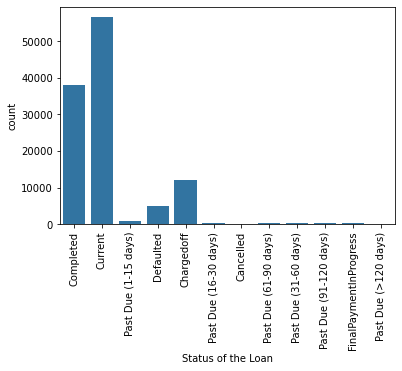

In [148]:
sb.countplot(data = features_df , x = 'LoanStatus', color = bc)
plt.xlabel('Status of the Loan')
plt.xticks(rotation = 90);

it apear that each past due date are small and i should group them

In [149]:
features_df['LoanStatus'] = features_df['LoanStatus'].replace(['Past Due (1-15 days)', 
                                                               'Past Due (31-60 days)',
                                                               'Past Due (61-90 days)',
                                                               'Past Due (91-120 days)',
                                                               'Past Due (16-30 days)',
                                                               'Past Due (>120 days)'],
                                                              'Past Due')

<ipython-input-149-e1825c883411>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df['LoanStatus'] = features_df['LoanStatus'].replace(['Past Due (1-15 days)',


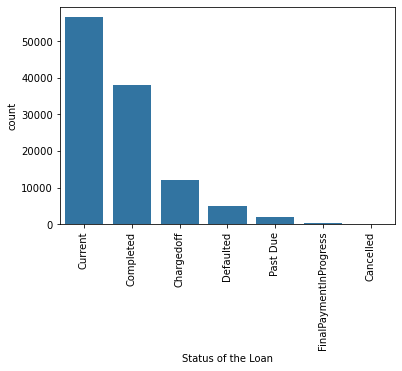

In [150]:
sb.countplot(data = features_df , x = 'LoanStatus', color = bc , order = features_df['LoanStatus'].value_counts().index)
plt.xlabel('Status of the Loan')
plt.xticks(rotation = 90);

Most of the loans are current or completed. which is good sign


but there is also alot of charged off, defaulted and past due ones

### ProsperScore

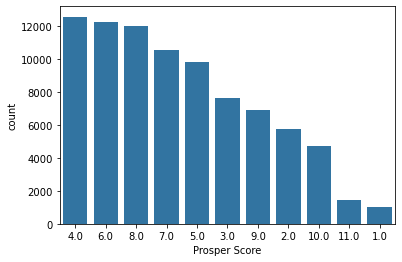

In [151]:
sb.countplot(data = features_df, x = 'ProsperScore', color = bc, order = features_df['ProsperScore'].value_counts().index)
plt.xlabel('Prosper Score');

it appear that the higher risk score (6,8,7) are gettting major of the loans

it's looks like the least risk score (1) are getting the least loans

### BorrowerRate

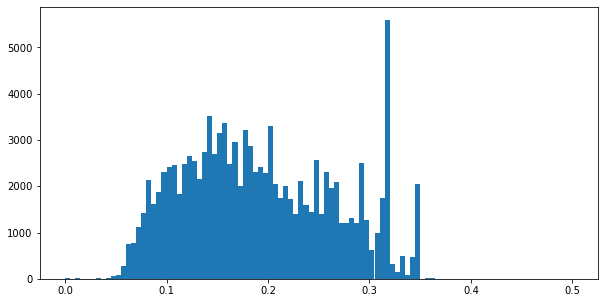

In [152]:
bins = np.arange(features_df.BorrowerRate.min(), features_df.BorrowerRate.max()+0.005, 0.005);
plt.figure(figsize=[10, 5]);
plt.hist(data = features_df, x = 'BorrowerRate', bins = bins);
plt.show();

it's looks like it's almost normally distributed a round 0.25

there  a peak at .33 rate

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Debt To Income Ratio

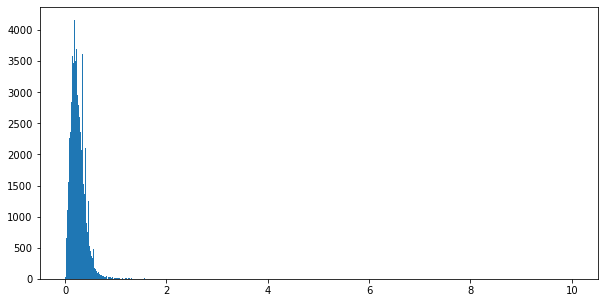

In [153]:
bins = np.arange(features_df.DebtToIncomeRatio.min(), features_df.DebtToIncomeRatio.max()+0.01, 0.01);
plt.figure(figsize=[10, 5]);
plt.hist(data = features_df, x = 'DebtToIncomeRatio', bins = bins);
plt.show();

the max is looks to be an outlier lets draw this more clear to limit of 2

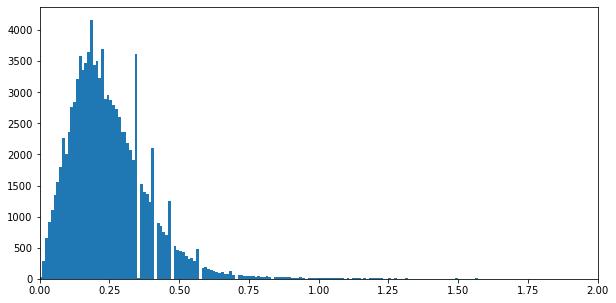

In [154]:
bins = np.arange(features_df.DebtToIncomeRatio.min(), features_df.DebtToIncomeRatio.max()+0.01, 0.01);
plt.figure(figsize=[10, 5]);
plt.hist(data = features_df, x = 'DebtToIncomeRatio', bins = bins);
plt.xlim((0,2));
plt.show();

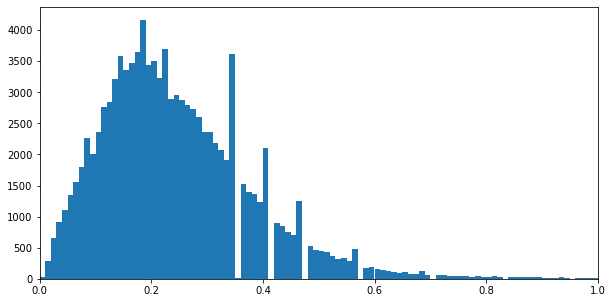

In [155]:
bins = np.arange(features_df.DebtToIncomeRatio.min(), features_df.DebtToIncomeRatio.max()+0.01, 0.01);
plt.figure(figsize=[10, 5]);
plt.hist(data = features_df, x = 'DebtToIncomeRatio', bins = bins);
plt.xlim((0,1));
plt.show();

in order to see some good distribution i needed to make the limit to 1

>it shows that the most common ration comes around .2

> there is some peak at .25

> there is some drop at in middle ratios like 0.33 , 0.5


### LoanOriginalAmount

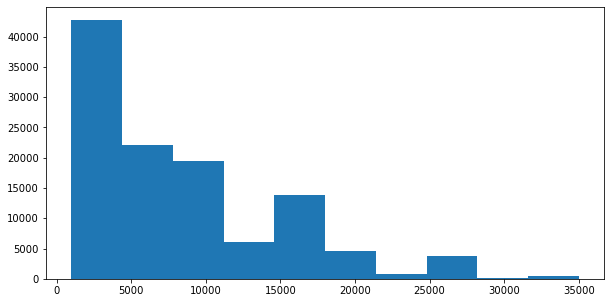

In [156]:
#bins = np.arange(features_df.DebtToIncomeRatio.min(), features_df.DebtToIncomeRatio.max()+0.01, 0.01);
plt.figure(figsize=[10, 5]);
plt.hist(data = features_df, x = 'LoanOriginalAmount');
plt.show();

it appear the most of the loans are quit small 5K ans so on

### IncomeRange

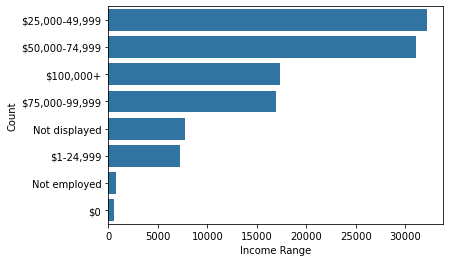

In [157]:
sb.countplot(data= features_df, y= 'IncomeRange', color= bc, order = features_df['IncomeRange'].value_counts().index)
plt.xlabel('Income Range');
plt.ylabel('Count');

it's looks like most of the loans were given to who there income is from **25K to 75K**

not small number though were given though to rich people with income from **75k to 100K** and more than 100K

### EmploymentStatus

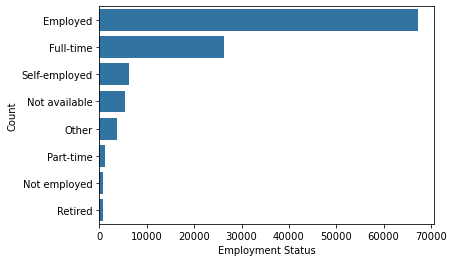

In [158]:
sb.countplot(data= features_df, y= 'EmploymentStatus', color= bc, order=features_df['EmploymentStatus'].value_counts().index);
plt.xlabel('Employment Status');
plt.ylabel('Count');

make sense to the loaner to borrow the employed ones as they will have the ability more to pay back 

### Occupation

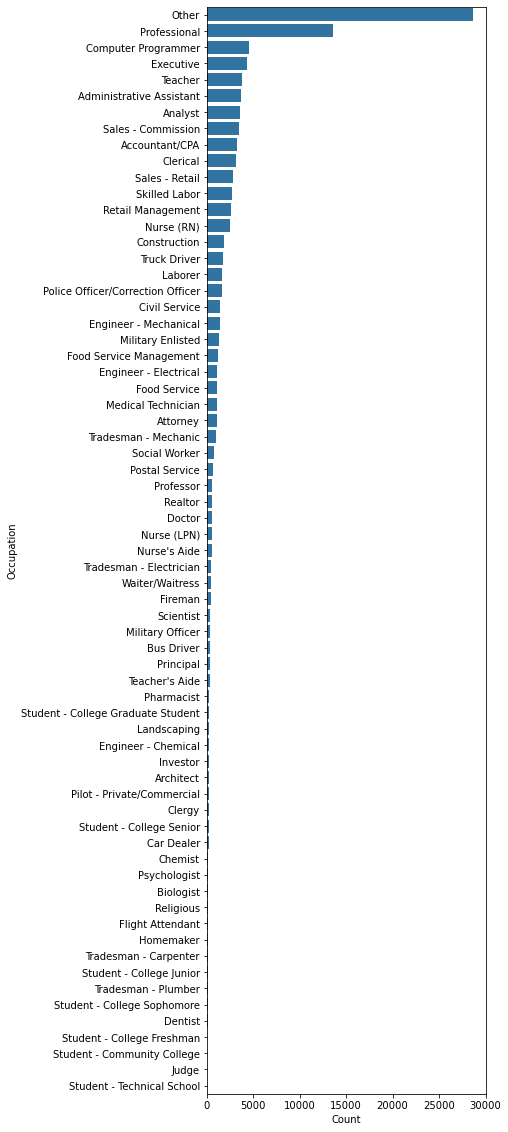

In [159]:
plt.figure(figsize=[5, 20]);
sb.countplot(data= features_df, y= 'Occupation', color= bc, order=features_df['Occupation'].value_counts().index);
plt.yticks(size = 10);
plt.ylabel('Occupation');
plt.xlabel('Count');

this data here not showing much really the employee status showed more as most of the value are others 

### by year

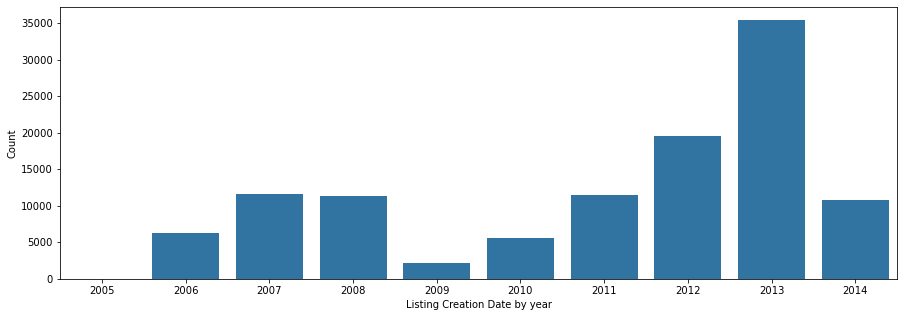

In [160]:
plt.figure(figsize = [15, 5])
sb.countplot(data= features_df, x= 'ListingCreationDate_year', color= bc,)
plt.xlabel('Listing Creation Date by year')
plt.ylabel('Count');

>it's increasing number over time with big spike at 2013 and decrease at 2014 which i think cuz not all data were collected in 2014

> there is some thing wired from 2007 - 2008 to 2009 and it was **Financial crisis of 2007–2008**

> Financial crisis of 2007–2008 effect can appear here 

### for months

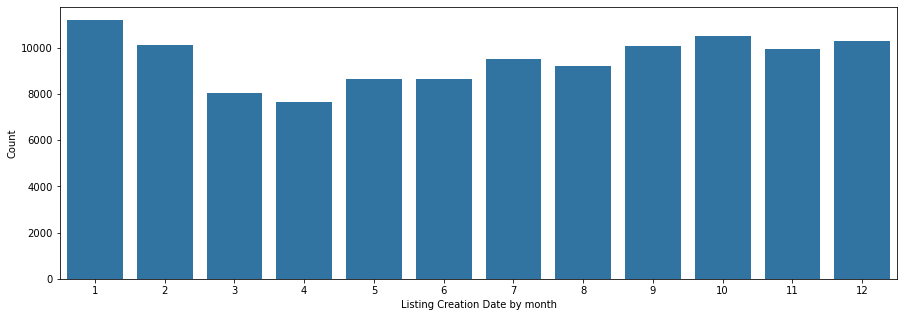

In [161]:
plt.figure(figsize = [15, 5])
sb.countplot(data= features_df, x= 'ListingCreationDate_month', color= bc,)
plt.xlabel('Listing Creation Date by month')
plt.ylabel('Count');

### term

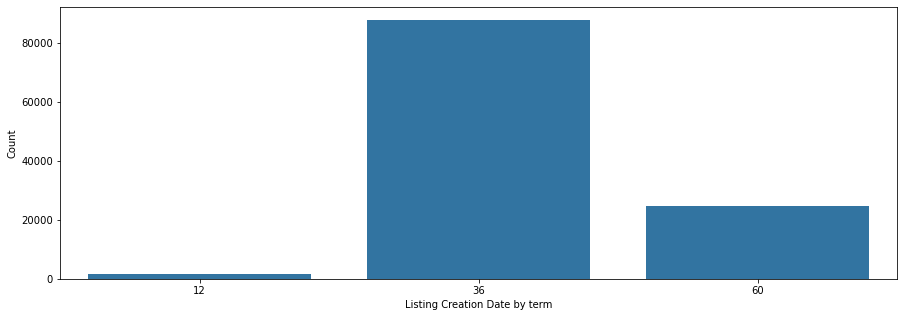

In [162]:
plt.figure(figsize = [15, 5])
sb.countplot(data= features_df, x= 'Term', color= bc,)
plt.xlabel('Listing Creation Date by term')
plt.ylabel('Count');

it appears that the 36 month are the highest loans 

12 month nearly there 

60 months have some good values in it 

if i can say some thing here it's appear that it start with highest NO of loans at the start of the year and slowly decreas till the first have and incease again 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> yes there is some spikes in nearly every plot 

> yes we need cleaning and more transformations for data

> Discuss the distribution : which is done under each one 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> yes there were some out liers and i did lim the data to see uniuqe views 

> The bar chart of the Prosper Score showed that there are customers in the data set that have a score of 11 which      should not be possible since the score just ranges from 1-10 i think i sould delet this observation or make it to 10 or just ignore it in modeling 

## Bivariate Exploration

In [163]:
numircal_vals = list(features_df.select_dtypes(include =('float64','int64')).columns)
numircal_vals

['BorrowerAPR',
 'BorrowerRate',
 'CurrentCreditLines',
 'DateCreditPulled_year',
 'DateCreditPulled_month',
 'DebtToIncomeRatio',
 'EmploymentStatusDuration',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'Investors',
 'ListingCategory (numeric)',
 'ListingNumber',
 'ListingCreationDate_year',
 'ListingCreationDate_month',
 'LoanOriginalAmount',
 'LoanOriginationDate_year',
 'LoanOriginationDate_month',
 'LP_CollectionFees',
 'LP_CustomerPayments',
 'LP_CustomerPrincipalPayments',
 'LP_GrossPrincipalLoss',
 'LP_InterestandFees',
 'LP_NetPrincipalLoss',
 'LP_NonPrincipalRecoverypayments',
 'LP_ServiceFees',
 'MonthlyLoanPayment',
 'OpenCreditLines',
 'OpenRevolvingAccounts',
 'ProsperScore',
 'Recommendations',
 'StatedMonthlyIncome',
 'Term',
 'TotalInquiries',
 'TotalTrades']

In [164]:
cat_vals = list(features_df.select_dtypes(include =('object','bool')).columns)
cat_vals 

['BorrowerState',
 'EmploymentStatus',
 'IncomeRange',
 'IncomeVerifiable',
 'IsBorrowerHomeowner',
 'ListingKey',
 'LoanStatus',
 'Occupation',
 'ProsperRating (Alpha)']

<AxesSubplot:>

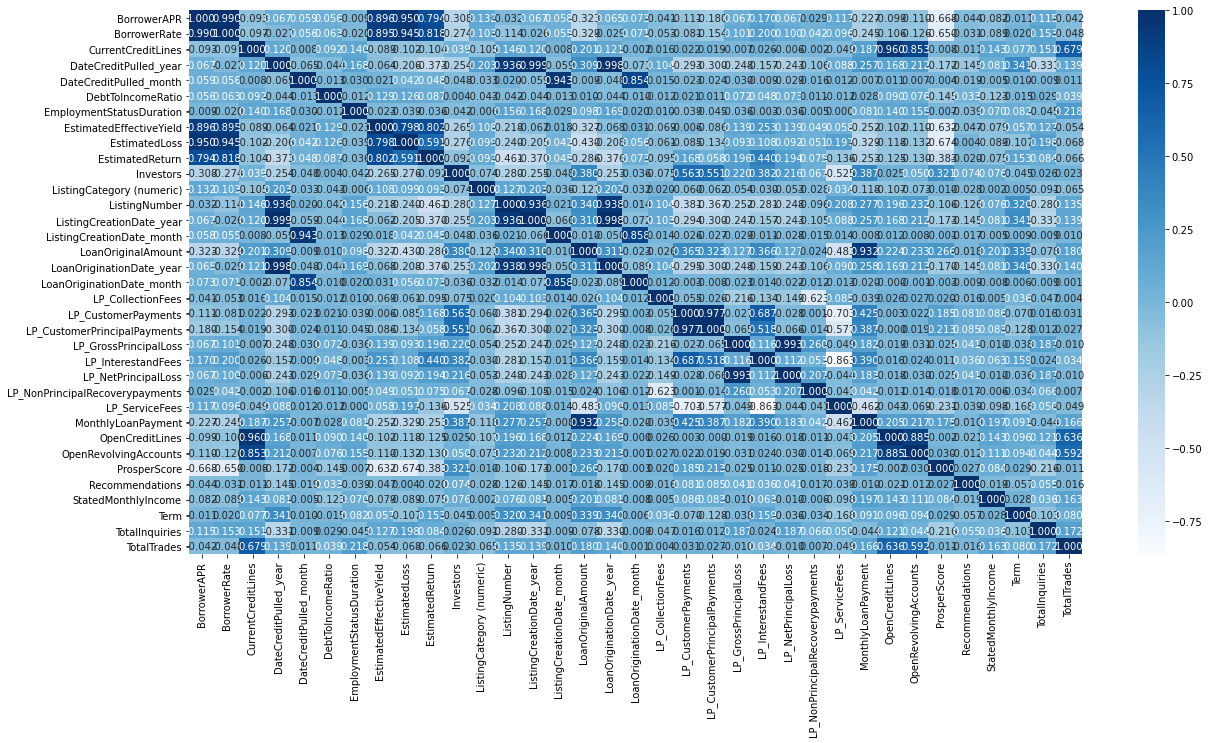

In [165]:
plt.figure(figsize = [20,10])
sb.heatmap(features_df[numircal_vals].corr(), annot = True, fmt = '.3f', cmap = 'Blues')

not so much to see here as it's alot of columns 

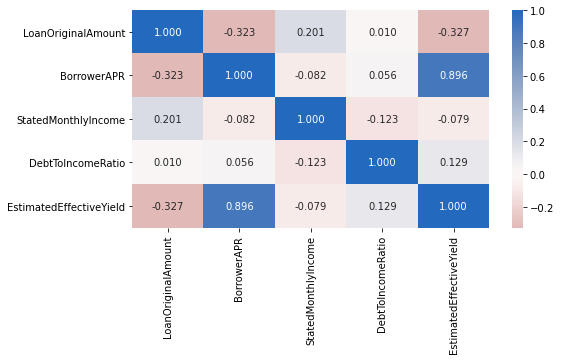

In [166]:
overlook_var1 = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome','DebtToIncomeRatio','EstimatedEffectiveYield']
plt.figure(figsize = [8, 4])
sb.heatmap(features_df[overlook_var1].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0);

>there is some negative correlation betweet borrower APR and loan original amount with value of **-0.323**
and that makes perfect sense 


>there is some positive correlation betweet borrower loan original amount and stated monthly income with value of **0.201**
another make sense statement as borrowers with more monthly income could loan more money

>some big positive correlation betweet Estimated Effective Yield and BorrowerAPR with vlaue **0.896**

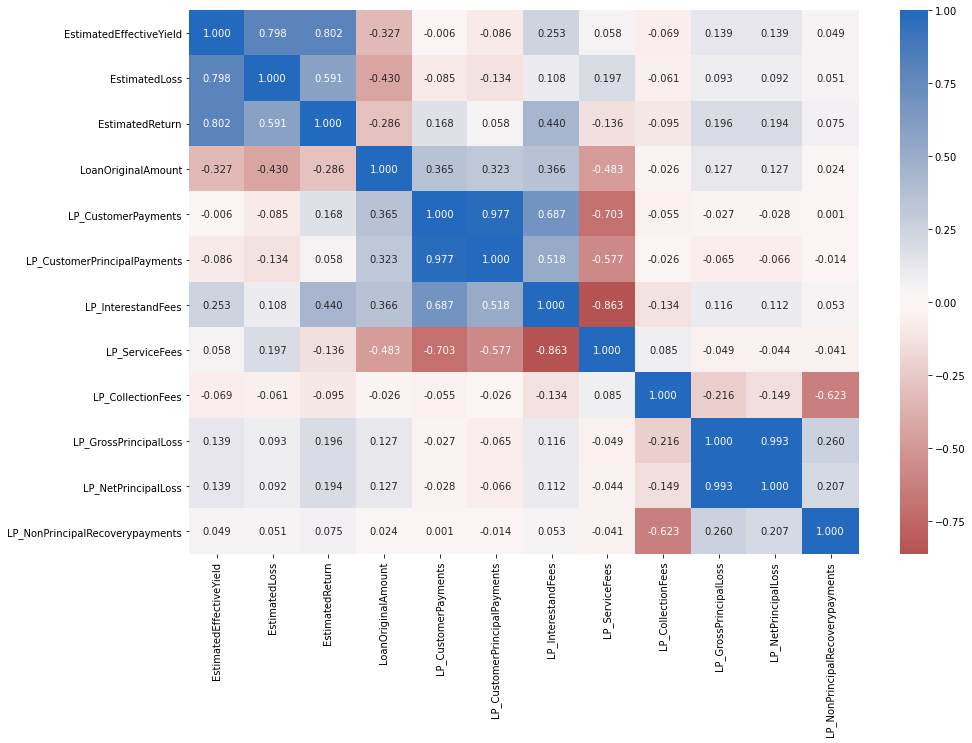

In [167]:
overlook_var2 = ['EstimatedEffectiveYield' , 'EstimatedLoss', 'EstimatedReturn', 'LoanOriginalAmount'
                , 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments','LP_InterestandFees','LP_ServiceFees','LP_CollectionFees'
               ,'LP_GrossPrincipalLoss','LP_NetPrincipalLoss','LP_NonPrincipalRecoverypayments']
plt.figure(figsize = [15, 10])
sb.heatmap(features_df[overlook_var2].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

this shows us that 
> The variables have strong correlation are:
>>1. EstimatedEffectiveYield has **negative** correlation with EstimatedLoss, and **positive** with EstimatedReturn
2. EstimatedLoss has **negative** correlation with EstimatedReturn
3. EstimatedReturn has **positive** correlation with EstimatedEffectiveYield, and **negative** with EstimatedLoss
4. LP_CustomerPayments has **positive** correlation with LP_CustomerPrincipalPayments
5. LP_CustomerPrincipalPayments has **positive** correlation with LP_CustomerPayments
6. LP_ServiceFees has **negative** correlation with LP_CustomerPayments , LP_CustomerPrincipalPayments and LP_InterestandFees
7. LP_GrossPrincipalLoss has **positive** correlation with LoanOriginalAmount and LP_NetPrincipalLoss
8. LP_NetPrincipalLoss has **positive** correlation with LoanOriginalAmount and LP_GrossPrincipalLoss

> The variables with no correlation are:
>>1. LP_InterestandFees
2. LP_CollectionFees
3. LP_NonPrincipalRecoverypayments

## LoanStatus and it's factors 

<Figure size 720x720 with 0 Axes>

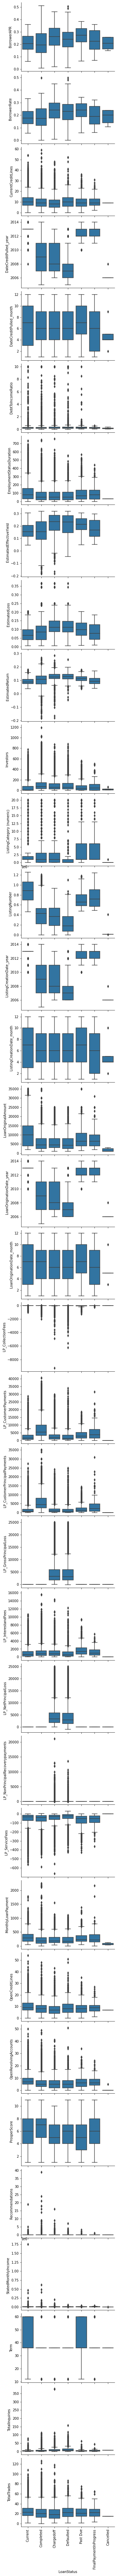

In [168]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color , order = features_df['LoanStatus'].value_counts().index)

plt.figure(figsize = [10, 10]);
g = sb.PairGrid(data = features_df, y_vars = numircal_vals, x_vars = ['LoanStatus'], height = 3, aspect = 1.5);
g.map(boxgrid);
plt.xticks(rotation=90, size = 10);

### plotting the monthy loan payment(numeric) vs  LoanStatus(cat) with a violinplot and a boxplot

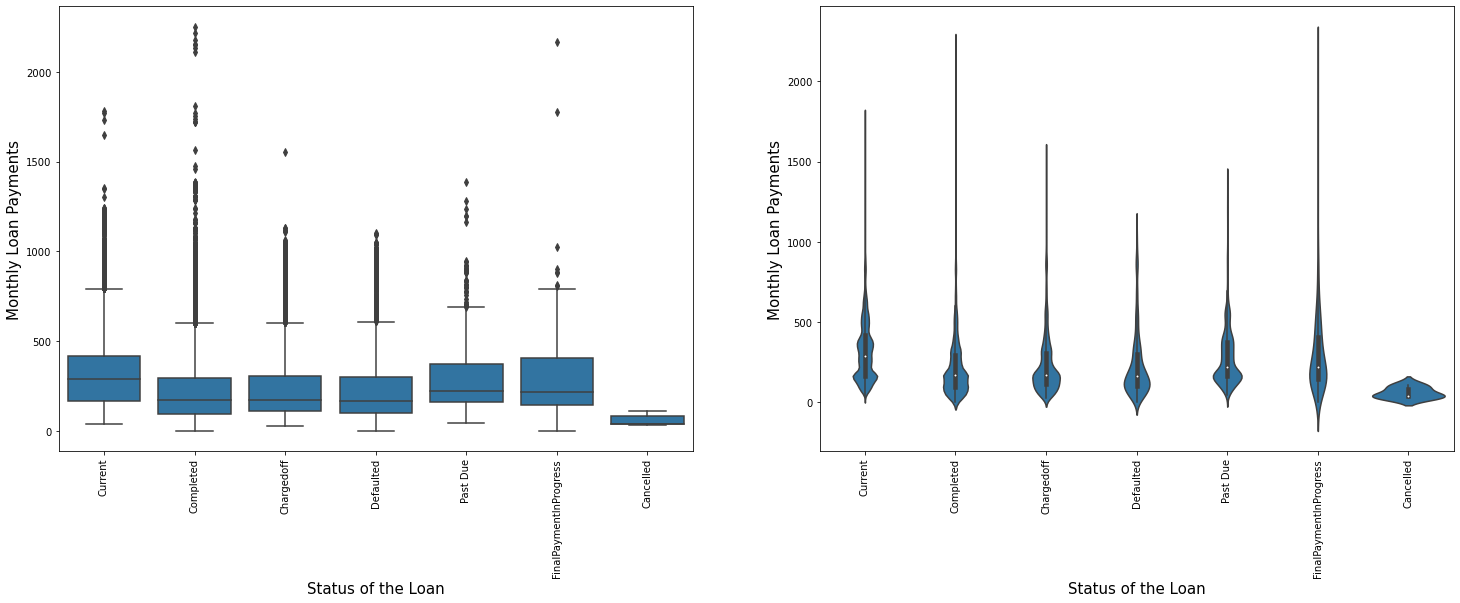

In [169]:
plt.figure(figsize = [25, 18])
plt.subplot(2, 2, 1)
sb.boxplot(data = features_df, x = 'LoanStatus', y = 'MonthlyLoanPayment', color = bc, order = features_df['LoanStatus'].value_counts().index)
plt.xticks(rotation=90, size = 10)
plt.xlabel('Status of the Loan', size = 15)
plt.ylabel('Monthly Loan Payments', size = 15)

plt.subplot(2, 2, 2)
sb.violinplot(data = features_df, x = 'LoanStatus', y = 'MonthlyLoanPayment', color = bc, order = features_df['LoanStatus'].value_counts().index)
plt.xticks(rotation=90, size = 10)
plt.xlabel('Status of the Loan', size = 15)
plt.ylabel('Monthly Loan Payments', size = 15);


The plots show weird relationship between the **monthly payments** and **the loan Status** loans that are charged-off, loans with past due payments and defaulted loans have almost same **average monthly payments** with others like current and completed

### plotting BorrowerRate (interest rate) vs (LoanStatus ) (cat) with a violinplot and a boxplot

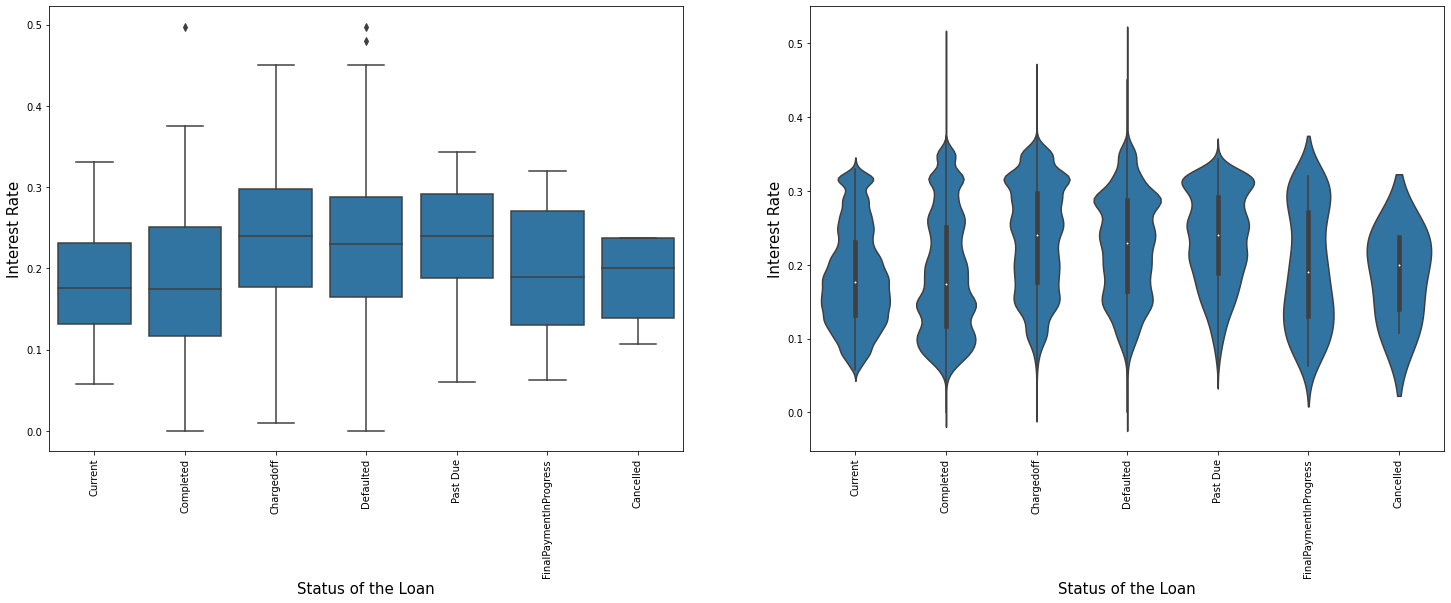

In [170]:
plt.figure(figsize = [25, 18])
plt.subplot(2, 2, 1)
sb.boxplot(data = features_df, x = 'LoanStatus', y = 'BorrowerRate', color = bc, order = features_df['LoanStatus'].value_counts().index)
plt.xticks(rotation=90, size = 10)
plt.xlabel('Status of the Loan', size = 15)
plt.ylabel('Interest Rate', size = 15)

plt.subplot(2, 2, 2)
sb.violinplot(data = features_df, x = 'LoanStatus', y = 'BorrowerRate', color = bc, order = features_df['LoanStatus'].value_counts().index)
plt.xticks(rotation=90, size = 10)
plt.xlabel('Status of the Loan', size = 15)
plt.ylabel('Interest Rate', size = 15);

The plots clearly show the past insight loans that are charged-off, loans with past due payments and defaulted loans have **in average higher interest rates** than loans that are completed. 

### plotting LoanOriginalAmount(numircal ) vs (LoanStatus ) (cat) with a violinplot and a boxplot

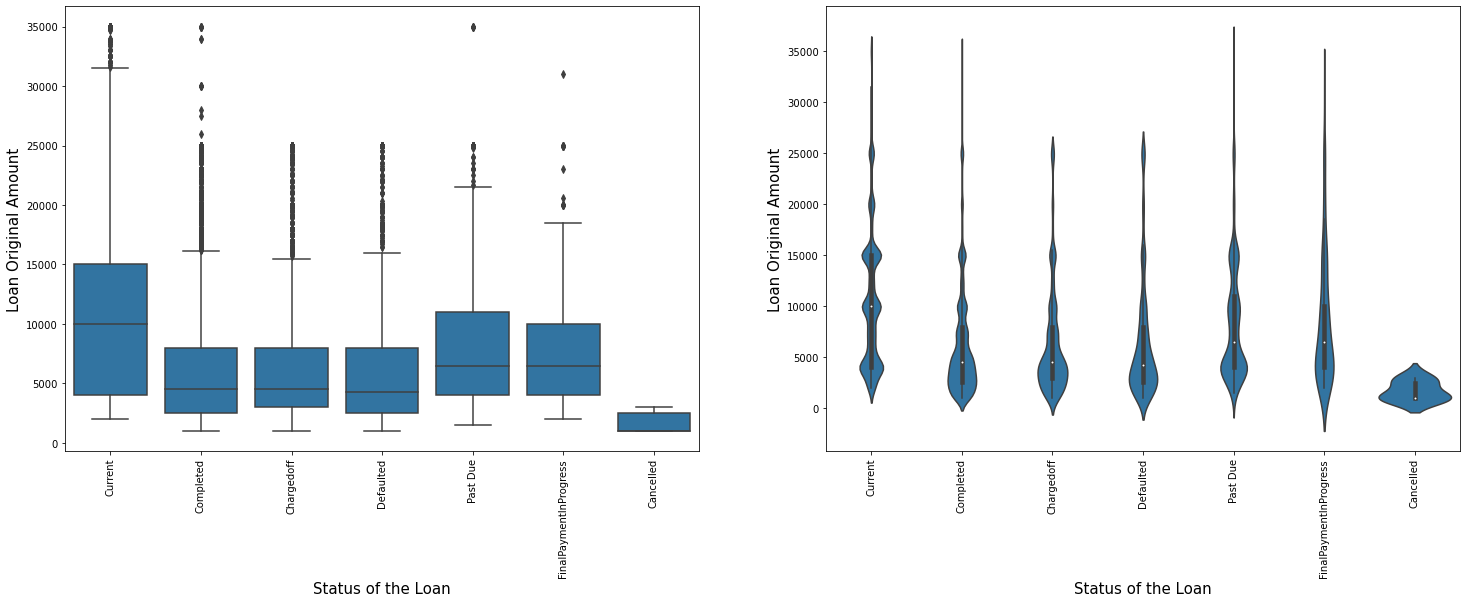

In [171]:
plt.figure(figsize = [25, 18])
plt.subplot(2, 2, 1)
sb.boxplot(data = features_df, x = 'LoanStatus', y = 'LoanOriginalAmount', color = bc, order = features_df['LoanStatus'].value_counts().index)
plt.xticks(rotation=90, size = 10)
plt.xlabel('Status of the Loan', size = 15)
plt.ylabel('Loan Original Amount', size = 15)

plt.subplot(2, 2, 2)
sb.violinplot(data = features_df, x = 'LoanStatus', y = 'LoanOriginalAmount', color = bc, order = features_df['LoanStatus'].value_counts().index)
plt.xticks(rotation=90, size = 10)
plt.xlabel('Status of the Loan', size = 15)
plt.ylabel('Loan Original Amount', size = 15);

The plots show weird relationship between the **Original Amounts** and **the loan Status** loans that are charged-off, loans with past due payments and defaulted loans have almost same **average Original Amount** with others like current and completed

### plotting Term (length of the Loan)(cat ) vs (LoanStatus ) (cat) with bar plot

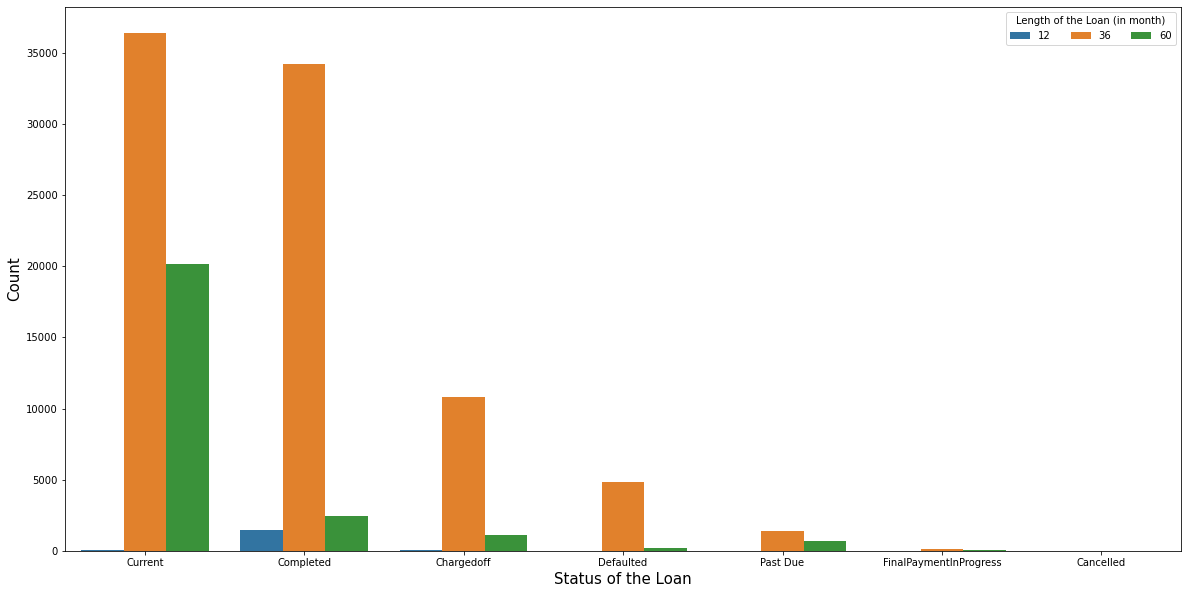

In [172]:
plt.figure(figsize = [20,10])
ax = sb.countplot(data = features_df, x = 'LoanStatus', hue = 'Term', order = features_df['LoanStatus'].value_counts().index)
plt.legend(loc = 1, ncol = 3, title = 'Length of the Loan (in month)')
plt.xticks(rotation = 0)
plt.xlabel('Status of the Loan', size = 15);
ax.set_ylabel("Count", size = 15);

The **length of the loan** have **NO impact** on the status of the loan.

### plotting EmploymentStatus(cat ) vs (LoanStatus ) (cat) with bar plot

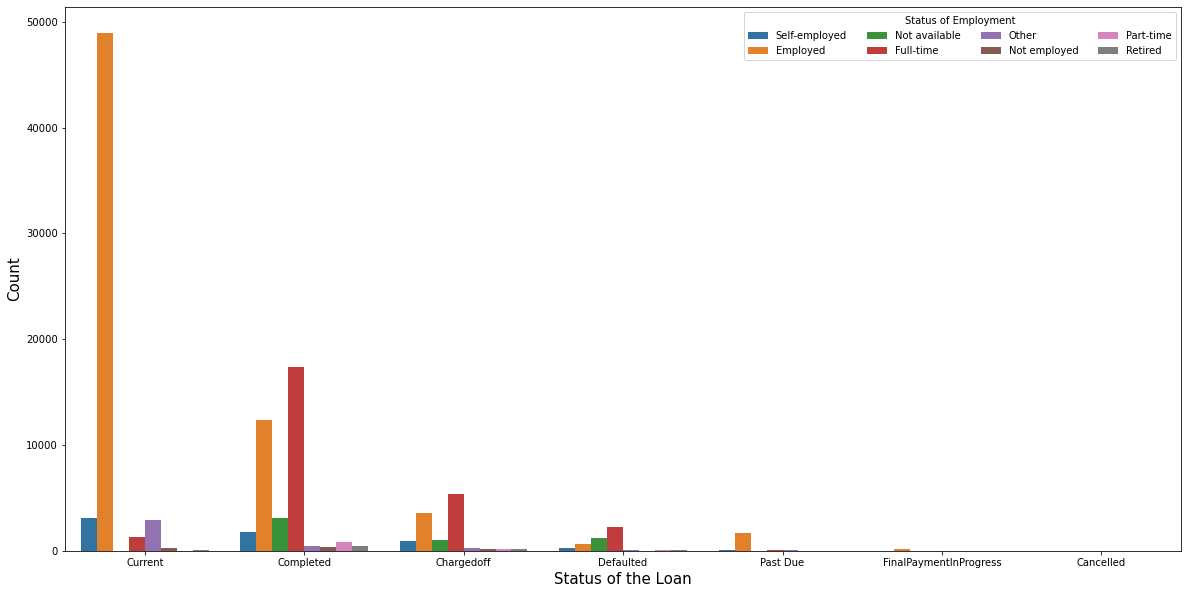

In [173]:
plt.figure(figsize = [20,10])
ax = sb.countplot(data = features_df, x = 'LoanStatus', hue = 'EmploymentStatus', order = features_df['LoanStatus'].value_counts().index)
plt.legend(loc = 1, ncol = 4, title = 'Status of Employment')
plt.xticks(rotation = 0)
plt.xlabel('Status of the Loan', size = 15);
ax.set_ylabel("Count", size = 15);

The **Status of Employment** have **NO impact** on the status of the loan.

### plotting EmploymentStatus(cat ) vs (LoanStatus ) (cat) with bar plot

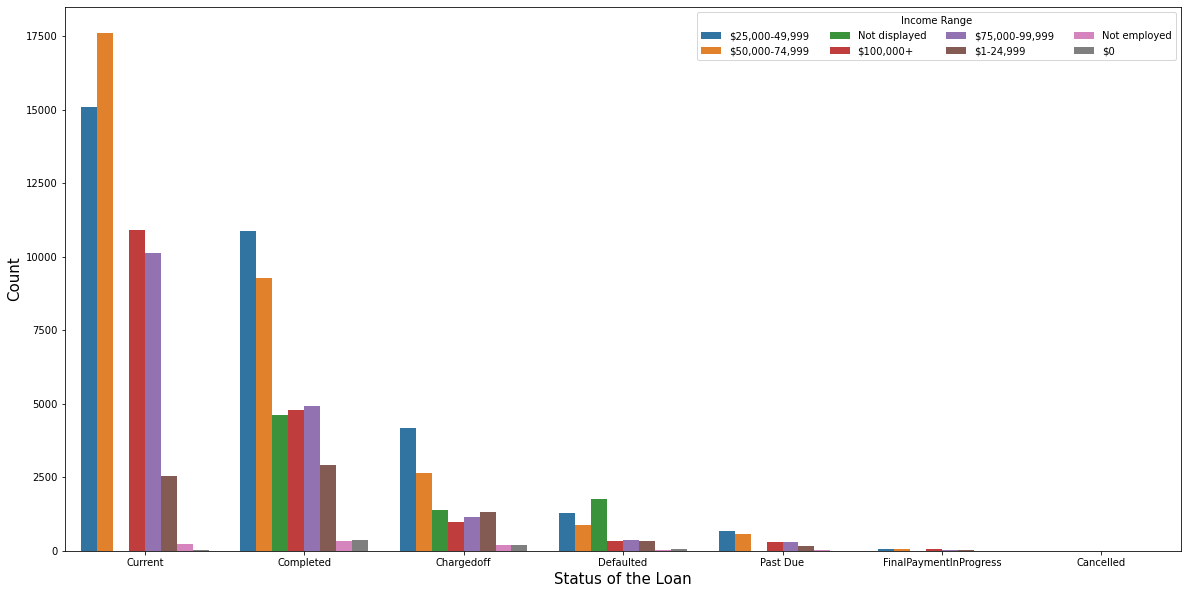

In [174]:
plt.figure(figsize = [20,10])
ax = sb.countplot(data = features_df, x = 'LoanStatus', hue = 'IncomeRange', order = features_df['LoanStatus'].value_counts().index)
plt.legend(loc = 1, ncol = 4, title = 'Income Range')
plt.xticks(rotation = 0)
plt.xlabel('Status of the Loan', size = 15);
ax.set_ylabel("Count", size = 15);

The **Income Range** have **NO impact** on the status of the loan.

#### final insight
loans that are **charged-off**, loans with **past due payments** and **defaulted loans** have **slightly higher average monthly payments**  compare to others like **current and completed**

loans that are **charged-off**, loans with **past due payments** and **defaulted loans** have **in average higher interest rates** compare to others like **current and completed**

loans that are **charged-off**, loans with **past due payments** and **defaulted loans** have almost same **average Original Amount** compare to others like **current and completed**

The **length of the loan** have **NO impact** on the status of the loan.

The **Status of Employment** have **NO impact** on the status of the loan.

The **Income Range** have **NO impact** on the status of the loan.

## Multivariate Exploration

## the relationship between the status/outcome of a loan and the Prosper Score in relation to the interest rate, On time Payments since they seem to have the strongest impact on the outcome of a loan.

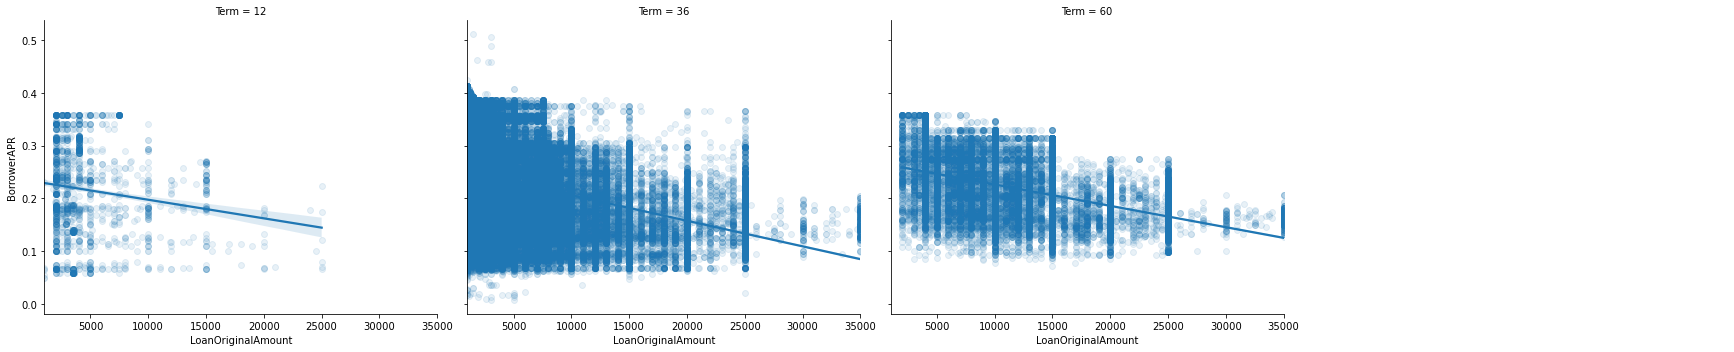

In [175]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data=features_df, aspect=1.2, height=5, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

looks like The **length of the loan** have **NO impact** on the APR and loan amount also

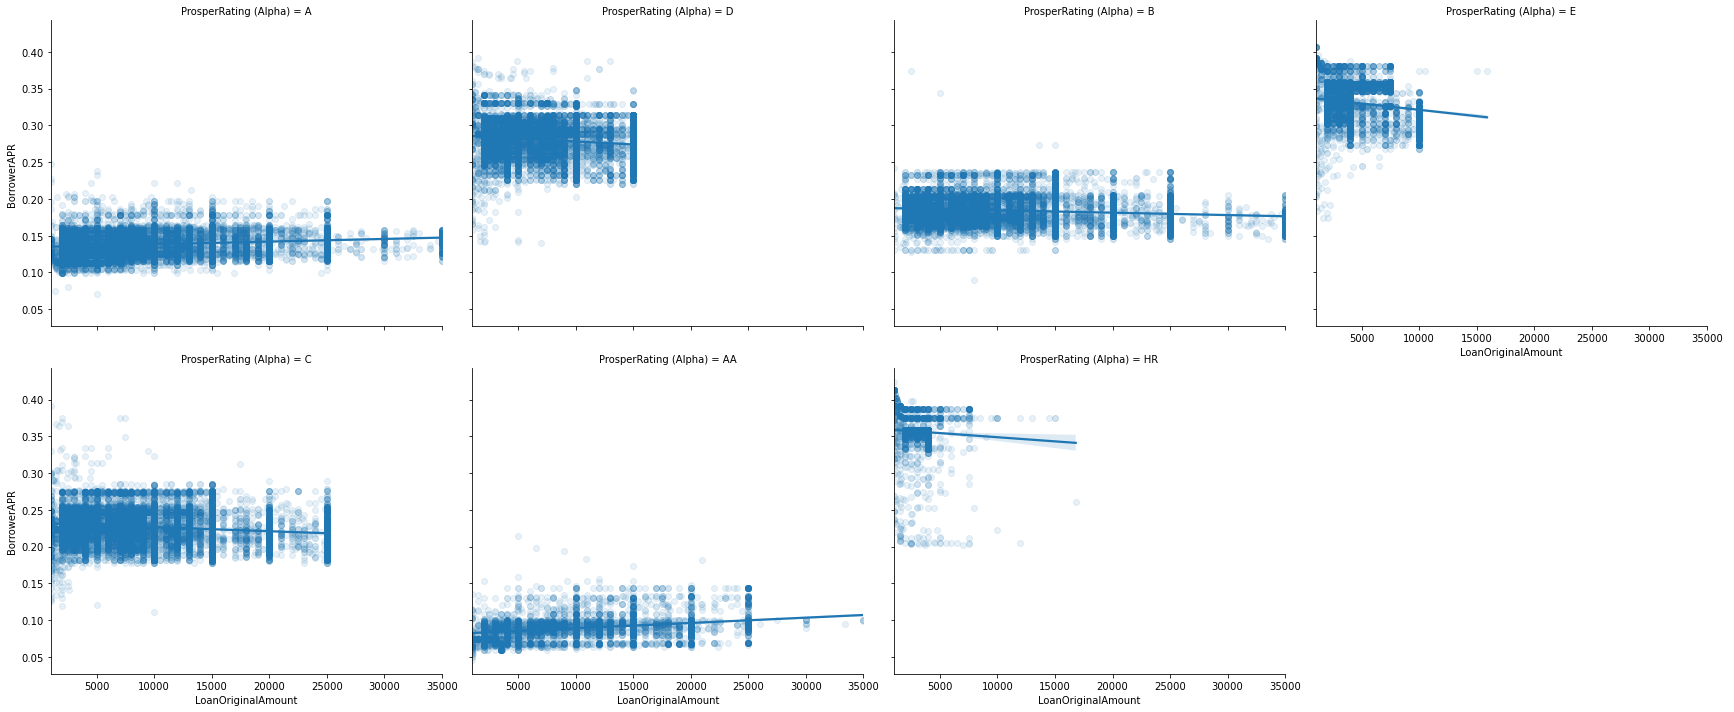

In [176]:
# Prosper rating effect on relationship of APR and loan amount
g=sb.FacetGrid(data=features_df, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

**The loan amount** **increases with better rating.** 
**The borrower APR decreases with better rating.** 


and the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased from HR to A or better.
This may because people with A or AA ratings tend to borrow more money, increasting APR could prevent them borrow even more and maximize the profit.
But people with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more. 

In [178]:
#save my final to csv for the slide part 
features_df.to_csv('features_df.csv')